Bagus Wicaksono Nurjayanto/1301194280/IF-42-GAB03

In [35]:
# Libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc
from statsmodels.tsa.stattools import adfuller 

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

In [48]:
tweets = pd.read_csv("/content/TweetsElonMusk.csv")
tweets = tweets[["id", "date", "time", "username", 
                 "tweet", "mentions", "urls", "photos", "replies_count", 
                 "retweets_count", "likes_count", "hashtags", "link"]]
tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])

In [ ]:
tweets.head()

In [ ]:
tweets.info()

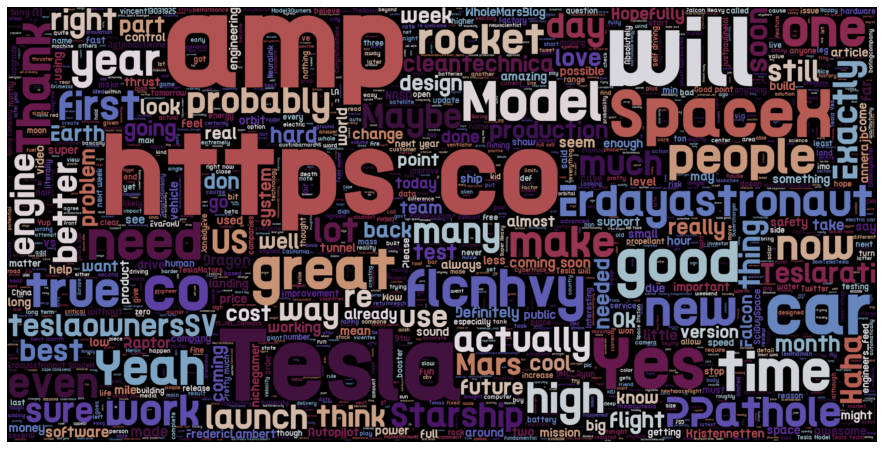

In [38]:
# Make worldcloud
all_tweets = " ".join(token for token in tweets["tweet"])
stopwords_wc = set(stopwords_wc)
font_path = "/content/acetone_font.otf"

wordcloud = WordCloud(stopwords=stopwords_wc, font_path=font_path,
                      max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "twilight")
wordcloud.generate(all_tweets)

# Plot
plt.figure(figsize = (20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

# Twitter

Elon musk mulai aktif menggunakan twitter pada tahun 2015, dan popularitasnya terus meningkat

In [ ]:
tweets = tweets.assign(Time=pd.to_datetime(tweets.time)).drop('id', axis='columns')
tweets.head(3)

In [ ]:
tweets['mentions'].notnull().value_counts() / len(tweets)

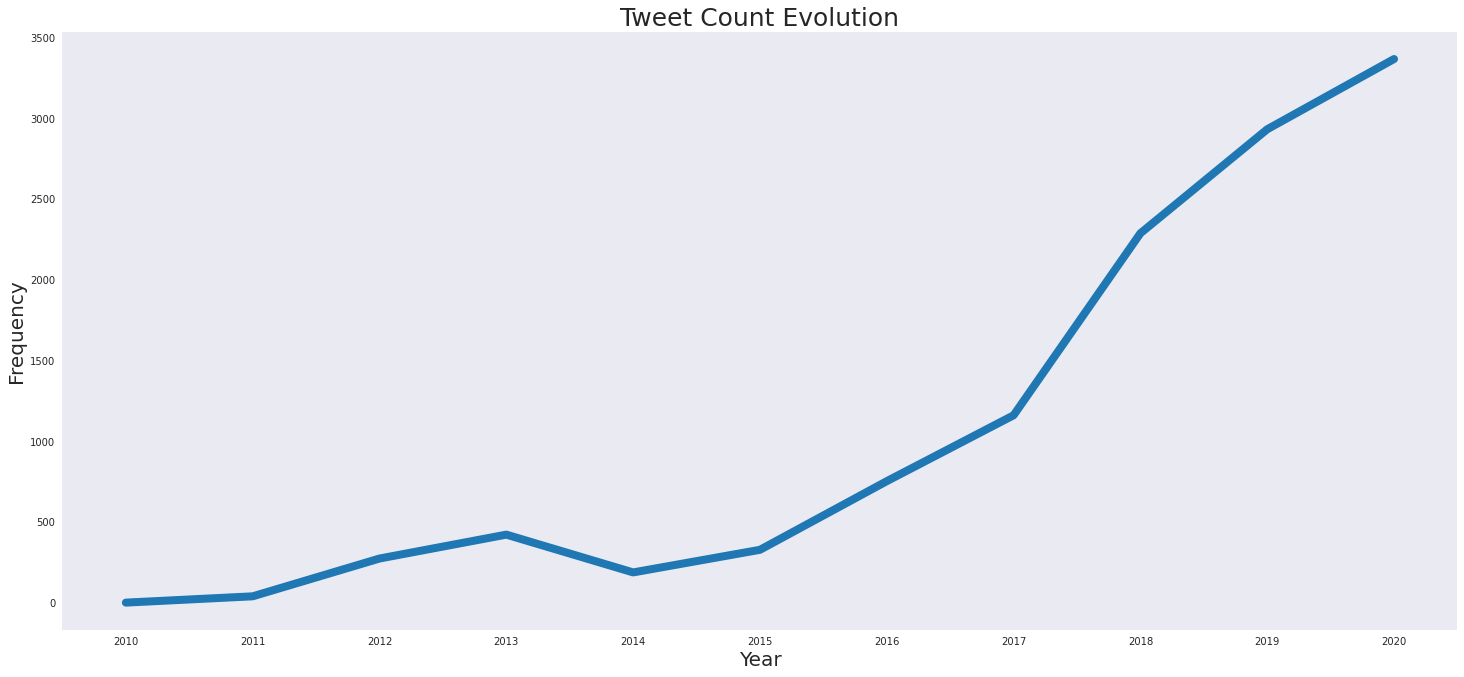

In [49]:
# Yearly evolution
import seaborn as sns
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True);

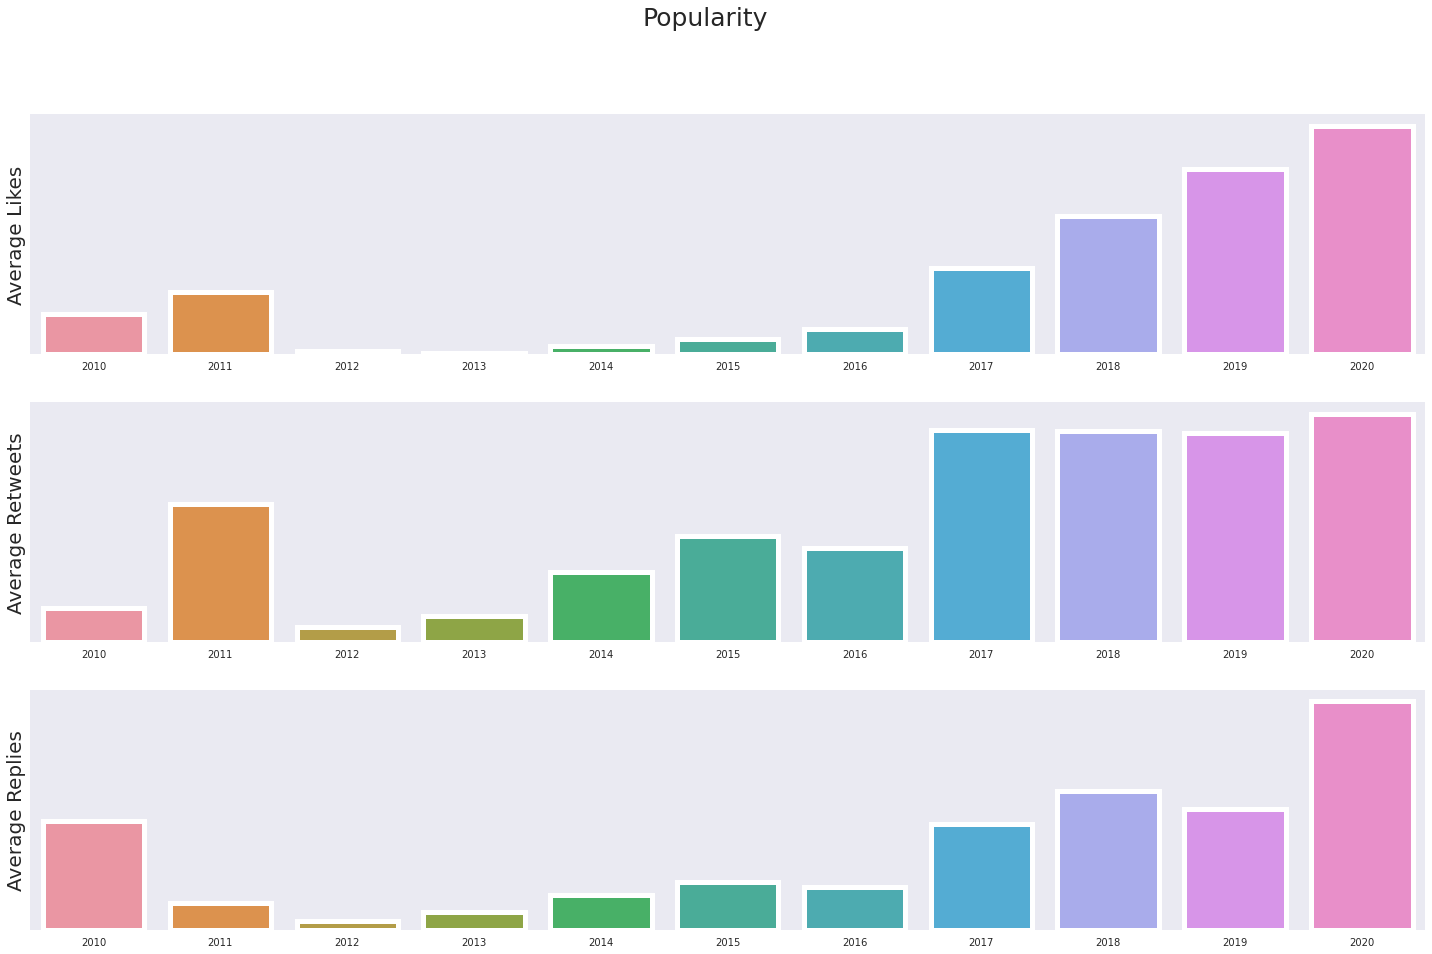

In [45]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=25)
sns.barplot(data=popularity_df, x="year", y="likes_count", lw=5, ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", lw=5, ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count", lw=5, ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=20)
    ax.set_ylabel(n, size=20)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
sns.despine(left=True);

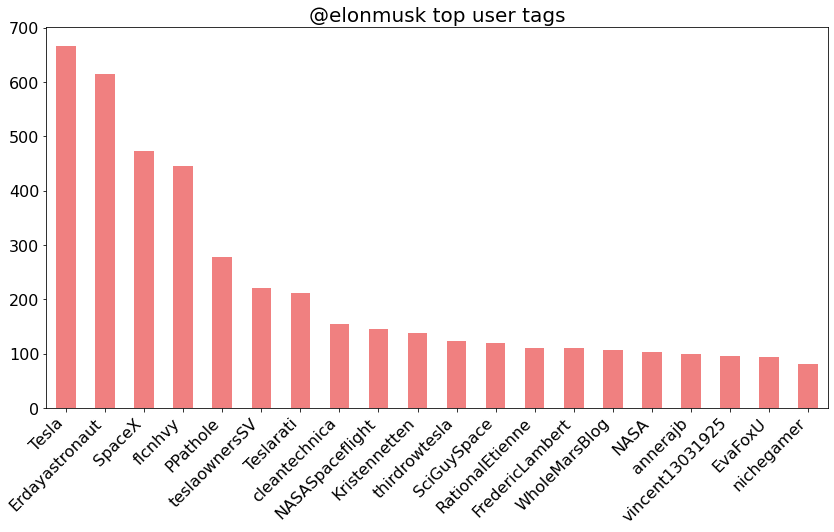

In [ ]:
import itertools

c = list(
itertools.chain(
    *tweets.tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

(tweets
     .set_index('time')
).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk number of tweets per day', fontsize=20)

# Mind

Berbicara tentang opini/komentar, kita bisa melihat pendapat seseorang dari twitter (kata yang dimention dalam tweetsnya) lengkap dengan sumbernya, dengan menggali dengan tokenisasi kata super sederhana di tweet ini 

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk import word_tokenize
tokens = tweets.tweet.map(word_tokenize)

def what_does_elon_think_about(x):
    x_l = x.lower()
    x_t = x.title()
    return tweets.loc[tokens.map(lambda sent: x_l in sent or x_t in sent).values]

In [ ]:
what_does_elon_think_about('Rocket').tweet.values.tolist()

['@DeltavPhotos @PortCanaveral That rocket is a hardcore veteran of many missions',
 '@engineers_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder.',
 'The Starship launch tower that catches the giant rocket booster is basically Mechazilla',
 '@WholeMarsBlog @Herbert_Diess Fuel cells should be called fool sells! Such a silly choice for cars. Not great even for a rocket upper stage imo, but at least not absurd.',
 '@totalspace360 Looks familiar haha. Nonetheless, the right move. Congrats to Rocket Lab.',
 '@DMC_Ryan New Roadster is part rocket',
 '@Erdayastronaut It’s a good path for fully renewable rocket energy, so solves part of problem, but longer chain hydrocarbons than CH4 are needed to be solid at room temp',
 '@Erdayastronaut @SpaceX That’s actually our restaurant, but SpaceX is building a futuristic bar at the top of the high bay with 360 degree windows &amp; a glass floor 

In [26]:
what_does_elon_think_about('Meme').tweet.values.tolist()

['Doge meme shield (legendary item)  https://t.co/CeomU9q84c',
 'Lil meme juice for the weekend  https://t.co/e9rVtk4SEe',
 'I am become meme, Destroyer of shorts',
 '@TheOnion 🎶To meme the impossible meme 🎶',
 'This meme proves it  https://t.co/3CHAzxv6dj',
 'Meme necromancy  https://t.co/8aPtXju7gF',
 '@coffeemaestro_ This is a great meme 🤣🤣',
 'I am become meme',
 'Meme of recursive irony  https://t.co/hlrfkd9yGy',
 '@nichegamer Actually, I stole it from my secret meme dealer #moneygang',
 '@flcnhvy 🎶 Non, je ne regrette meme 🎶',
 'Original moth meme  https://t.co/BYDQRzIine',
 'Great meme review hosted by Will Smith',
 'Did meme review last night with Justin Roiland from @RickandMorty',
 'Host meme review?  https://t.co/k2SFtIUh1k',
 'Fresh puro from my meme dealer  https://t.co/EdU5uJVVne',
 '@paulkrugman Idiots can be very dangerous when they seem smart, but aren’t (having “PhD” in their bio is a dead giveaway), as some policymakers may get fooled. That’s what really bothered me 